In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_original = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)




2024-03-17 17:55:43.600655: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 17:55:43.600774: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 17:55:43.736462: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 - 3s - 2ms/step - accuracy: 0.8165 - loss: 0.5243 - val_accuracy: 0.8386 - val_loss: 0.4529
Epoch 2/10
1500/1500 - 2s - 2ms/step - accuracy: 0.8597 - loss: 0.3907 - val_accuracy: 0.8671 - val_loss: 0.3701
Epoch 3/10
1500/1500 - 2s - 2ms/step - accuracy: 0.8719 - loss: 0.3492 - val_accuracy: 0.8622 - val_loss: 0.3841
Epoch 4/10
1500/1500 - 3s - 2ms/step - accuracy: 0.8824 - loss: 0.3204 - val_accuracy: 0.8751 - val_loss: 0.3435
Epoch 5/10
1500/1500 - 2s - 2ms/step - accuracy: 0.8884 - loss: 0.3025 - val_accuracy: 0.8645 - val_loss: 0.3780
Epoch 6/10
1500/1500 - 3s - 2ms/step - accuracy: 0.8920 - loss: 0.2885 - val_accuracy: 0.8793 - val_loss: 0.3338
Epoch 7/10
1500/1500 - 2s - 2ms/step - accuracy: 0.8989 - loss: 0.2723 - val_accuracy: 0.8827 - val_loss: 0.3289
Epoch 8/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9021 - loss: 0.2617 - val_accuracy: 0.8849 - val_loss: 0.3263
Epoch 9/10
1500/1500 - 2s - 2ms/step - accuracy: 0.9064 - loss: 0.2499 - val_accuracy: 0.8889 - 

In [3]:
def flip_labels_randomly(y, fraction):
    """
    Randomly flip a fraction of the labels in y.
    """
    n_samples = int(len(y) * fraction)
    indices_to_flip = np.random.choice(len(y), n_samples, replace=False)
    y_flipped = y.copy()
    for index in indices_to_flip:
        # Randomly select a new label different from the current one
        current_label = np.argmax(y_flipped[index])
        possible_labels = [i for i in range(y.shape[1]) if i != current_label]
        new_label = np.random.choice(possible_labels)
        y_flipped[index] = np.eye(y.shape[1])[new_label]
    return y_flipped



In [4]:
def manipulate_labels_to_common_class(y, fraction):
    """
    Manipulate labels to maximize confusion by flipping a fraction of labels to the most common class.
    """
    # Identify the most common class
    most_common_class = np.argmax(np.sum(y, axis=0))
    
    # Determine number of labels to manipulate
    n_samples = int(len(y) * fraction)
    
    # Randomly select samples to manipulate
    indices_to_manipulate = np.random.choice(len(y), n_samples, replace=True)
    
    # Manipulate selected labels
    y_manipulated = y.copy()
    for index in indices_to_manipulate:
        y_manipulated[index] = np.eye(y.shape[1])[most_common_class]
        
    return y_manipulated



Fraction manipulated: 0.001, Test accuracy: 0.8788999915122986
Fraction manipulated: 1.87, Test accuracy: 0.10050000250339508
Fraction manipulated: 20.5, Test accuracy: 0.10000000149011612
Fraction manipulated: 30.9, Test accuracy: 0.10000000149011612
Fraction manipulated: 50.2, Test accuracy: 0.10000000149011612
Fraction manipulated: 60.5, Test accuracy: 0.10000000149011612
Fraction manipulated: 70.76, Test accuracy: 0.10000000149011612


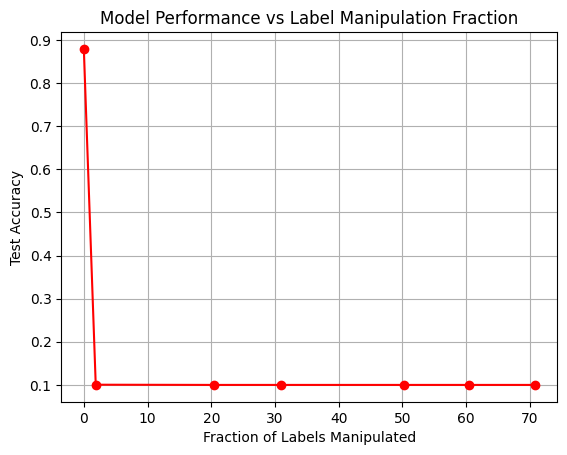

In [5]:
fractions = [0.001, 1.87, 20.5, 30.9, 50.2, 60.5, 70.76]
accuracies = []

for fraction in fractions:
    # Manipulate labels
    y_train_manipulated = manipulate_labels_to_common_class(y_train, fraction)
    
    # Reinitialize the model 
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model with manipulated labels
    history = model.fit(X_train, y_train_manipulated, epochs=10, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(test_acc)
    print(f"Fraction manipulated: {fraction}, Test accuracy: {test_acc}")

# Plotting
plt.plot(fractions, accuracies, marker='o', linestyle='-', color='red')
plt.title('Model Performance vs Label Manipulation Fraction')
plt.xlabel('Fraction of Labels Manipulated')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()



In [6]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=42)
y = to_categorical(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the original dataset
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Baseline Accuracy: {accuracy:.2f}')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Baseline Accuracy: 0.90


In [7]:
def manipulate_labels(y_train, percentage=10):
    """Manipulate labels within the training set by a given percentage."""
    np.random.seed(42)
    manipulated_indices = np.random.choice(np.arange(len(y_train)), replace=False, 
                                            size=int(len(y_train) * (percentage / 100)))
    
    for idx in manipulated_indices:
        current_label = np.argmax(y_train[idx])
        possible_labels = list(range(y_train.shape[1]))
        possible_labels.remove(current_label)
        new_label = np.random.choice(possible_labels)
        y_train[idx] = to_categorical(new_label, num_classes=y_train.shape[1])
    return y_train


# Example of manipulating 90% of the labels
y_train_manipulated = manipulate_labels(np.copy(y_train), percentage=90)

# Re-train the model with manipulated labels and compare performance
model_manipulated = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model_manipulated.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_manipulated = model_manipulated.fit(X_train, y_train_manipulated, epochs=20, validation_split=0.1, verbose=0)

loss_manipulated, accuracy_manipulated = model_manipulated.evaluate(X_test, y_test, verbose=0)
print(f'Manipulated Accuracy (90% flipped): {accuracy_manipulated:.4f}')


Manipulated Accuracy (90% flipped): 0.1200


In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data
y_train_cat = to_categorical(y_train)  # One-hot encoding for the labels
y_test_cat = to_categorical(y_test)

# simple neural network model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

# Train the model
history = model.fit(x_train, y_train_cat, epochs=10, validation_split=0.2, verbose=2)

# Evaluate the model on the test dataset
baseline_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)[1]
print(f"Baseline Accuracy: {baseline_accuracy*100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 - 4s - 3ms/step - accuracy: 0.9176 - loss: 0.2894 - val_accuracy: 0.9557 - val_loss: 0.1558
Epoch 2/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9622 - loss: 0.1278 - val_accuracy: 0.9663 - val_loss: 0.1146
Epoch 3/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9746 - loss: 0.0864 - val_accuracy: 0.9686 - val_loss: 0.1020
Epoch 4/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9805 - loss: 0.0642 - val_accuracy: 0.9703 - val_loss: 0.0959
Epoch 5/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9850 - loss: 0.0492 - val_accuracy: 0.9721 - val_loss: 0.0907
Epoch 6/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9888 - loss: 0.0382 - val_accuracy: 0.9737 - val_loss: 0.0945
Epoch 7/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9906 - loss: 0.0302 - val_accuracy: 0.9706 - val_loss: 0.1052
Epoch 8/10
1500/1500 - 5s - 3ms/step - accuracy: 0.9927 - loss: 0.0243 - val_accuracy: 0.9758 - val_loss: 0.0922
Epoch 9/10
1500/1500 - 3s - 2ms/step - accuracy: 0.9942 - loss: 0.0193 - val_accuracy: 0.9741 - val_loss: 0

In [9]:
def strategically_flip_labels(y, percentage=0.9):
    """
    Flips labels within the training set to a strategically chosen class to maximize confusion.
    `percentage` controls what fraction of the dataset to manipulate.
    """
    np.random.seed(42)  # reproducibility
    indices = np.random.choice(np.arange(len(y)), replace=False,
                               size=int(len(y) * percentage))
    # Mapping designed to maximize confusion
    confusion_map = {0: 8, 1: 7, 2: 8, 3: 8, 4: 9, 5: 8, 6: 8, 7: 1, 8: 0, 9: 4}
    
    y_flipped = y.copy()
    for idx in indices:
        original_label = y[idx]
        y_flipped[idx] = confusion_map[original_label]
    
    return y_flipped

# Percentage of labels to manipulate
percentages = [0.1, 0.2, 0.5, 0.7, 0.8, 0.85, 0.9, 0.98]
accuracies = []

for percentage in percentages:
    # Flip labels and convert to categorical
    y_train_flipped = strategically_flip_labels(y_train, percentage)
    y_train_flipped_cat = to_categorical(y_train_flipped)


In [10]:
for percentage in percentages:
    # Flip labels and convert to categorical
    y_train_flipped = strategically_flip_labels(y_train, percentage)
    y_train_flipped_cat = to_categorical(y_train_flipped)

    # Create a new labels of the model 
    model_with_flipped_labels = create_model()

    # Re-train the model with strategically flipped labels
    history_flipped = model_with_flipped_labels.fit(x_train, y_train_flipped_cat, epochs=10, validation_split=0.2, verbose=2)

    # Evaluate the model on the test dataset
    accuracy_with_flipped = model_with_flipped_labels.evaluate(x_test, y_test_cat, verbose=0)[1]
    accuracies.append(accuracy_with_flipped)
    print(f"Accuracy with {percentage*100}% Manipulated Labels: {accuracy_with_flipped*100:.2f}%")


Epoch 1/10
1500/1500 - 4s - 2ms/step - accuracy: 0.8161 - loss: 0.6294 - val_accuracy: 0.8568 - val_loss: 0.4947
Epoch 2/10
1500/1500 - 3s - 2ms/step - accuracy: 0.8581 - loss: 0.4781 - val_accuracy: 0.8701 - val_loss: 0.4600
Epoch 3/10
1500/1500 - 5s - 3ms/step - accuracy: 0.8689 - loss: 0.4377 - val_accuracy: 0.8695 - val_loss: 0.4417
Epoch 4/10
1500/1500 - 5s - 3ms/step - accuracy: 0.8749 - loss: 0.4102 - val_accuracy: 0.8631 - val_loss: 0.4504
Epoch 5/10
1500/1500 - 3s - 2ms/step - accuracy: 0.8795 - loss: 0.3897 - val_accuracy: 0.8711 - val_loss: 0.4393
Epoch 6/10
1500/1500 - 3s - 2ms/step - accuracy: 0.8825 - loss: 0.3743 - val_accuracy: 0.8722 - val_loss: 0.4448
Epoch 7/10
1500/1500 - 3s - 2ms/step - accuracy: 0.8848 - loss: 0.3609 - val_accuracy: 0.8740 - val_loss: 0.4391
Epoch 8/10
1500/1500 - 5s - 3ms/step - accuracy: 0.8889 - loss: 0.3446 - val_accuracy: 0.8673 - val_loss: 0.4470
Epoch 9/10
1500/1500 - 3s - 2ms/step - accuracy: 0.8902 - loss: 0.3355 - val_accuracy: 0.8723 - 

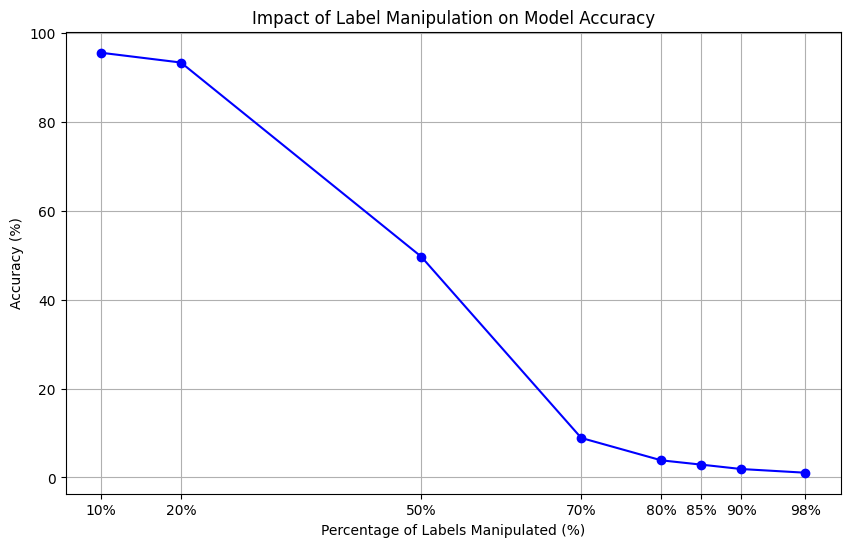

In [11]:
# Plotting the impact of label manipulation
plt.figure(figsize=(10, 6))
plt.plot(percentages, [a*100 for a in accuracies], marker='o', linestyle='-', color='blue')
plt.title('Impact of Label Manipulation on Model Accuracy')
plt.xlabel('Percentage of Labels Manipulated (%)')
plt.ylabel('Accuracy (%)')
plt.xticks(percentages, [f"{p*100:.0f}%" for p in percentages])
plt.grid(True)
plt.show()